In [47]:
import os
import pandas as pd
import numpy as np

In [ ]:
path = "/opt/ml/input/data/train"

In [ ]:
data_ratings = pd.read_csv(os.path.join(path, "train_ratings.csv"))
data_titles = pd.read_csv(os.path.join(path, "titles.tsv"), delimiter='\t')
data_writers = pd.read_csv(os.path.join(path, "writers.tsv"), delimiter='\t')
data_years = pd.read_csv(os.path.join(path, "years.tsv"), delimiter='\t')
data_directors = pd.read_csv(os.path.join(path, "directors.tsv"), delimiter='\t')
data_genres = pd.read_csv(os.path.join(path, "genres.tsv"), delimiter='\t')

In [31]:
data_ratings.info()
data_ratings.sample(4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5154471 entries, 0 to 5154470
Data columns (total 3 columns):
 #   Column  Dtype
---  ------  -----
 0   user    int64
 1   item    int64
 2   time    int64
dtypes: int64(3)
memory usage: 118.0 MB


,user,item,time
2399287,63781,2594,1420470100
1399126,36884,541,1198077183
1151289,30322,33794,1166476865
188496,4748,7178,1147125184


In [32]:
num_users = data_ratings['user'].nunique()
num_items = data_ratings['item'].nunique()

print("Num_Users :", num_users)
print("Num_items :", num_items)

Num_Users : 31360
Num_items : 6807


In [33]:
print("Data Spasity Ratio :", 1 - len(data_ratings) / (num_users * num_items))

Data Spasity Ratio : 0.9758536052697853


In [34]:
data_writers.info()
data_writers.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11306 entries, 0 to 11305
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   item    11306 non-null  int64 
 1   writer  11306 non-null  object
dtypes: int64(1), object(1)
memory usage: 176.8+ KB


,item,writer
4872,48082,nm0327273
6911,3984,nm0542539
10021,1984,nm0908890
3584,1907,nm0177170
4515,44972,nm0294997


In [36]:
data_titles.info()
data_titles.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6807 entries, 0 to 6806
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   item    6807 non-null   int64 
 1   title   6807 non-null   object
dtypes: int64(1), object(1)
memory usage: 106.5+ KB


,item,title
3763,71254,Gamer (2009)
6560,5387,Enough (2002)
6260,60397,Mamma Mia! (2008)
5950,8695,"Bachelor and the Bobby-Soxer, The (1947)"
3876,2093,Return to Oz (1985)


In [37]:
data_genres.info()
data_genres.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15933 entries, 0 to 15932
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   item    15933 non-null  int64 
 1   genre   15933 non-null  object
dtypes: int64(1), object(1)
memory usage: 249.1+ KB


,item,genre
15222,26271,Drama
2842,34153,Documentary
936,1921,Drama
638,903,Mystery
5853,3854,Romance


In [38]:
data_directors.info()
data_directors.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5905 entries, 0 to 5904
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   item      5905 non-null   int64 
 1   director  5905 non-null   object
dtypes: int64(1), object(1)
memory usage: 92.4+ KB


,item,director
5036,1023,nm0789313
121,1248,nm0000080
1109,31150,nm0000835
2084,29,nm0001988
911,5010,nm0000631


In [41]:
active_user_ids = data_ratings.value_counts("user").index[:10]
popular_movie_ids = data_ratings.value_counts("item").index[:10]

print("Active user:", active_user_ids)
print("Popular movies:", popular_movie_ids)

Active user: Int64Index([8405, 54465, 24219, 32514, 91349, 131904, 34576, 99754, 31122,
            118754],
           dtype='int64', name='user')
Popular movies: Int64Index([2571, 2959, 296, 318, 356, 4993, 7153, 5952, 593, 2858], dtype='int64', name='item')


In [43]:
director_df = pd.merge(data_ratings, data_directors, on=['item'])
director_id = director_df.value_counts("director").index[:10]

side_df = []
for director in director_id:
    side_df.append(director_df.loc[director_df["director"]==director])

director_top = pd.concat(side_df)

print("number of unique director ids:", director_df['director'].nunique())
print("\ntop 10 director ids: \n", director_id)
print("\nsample of top 10 user-director data: \n", director_top.sample(5))
print("\nshape of the data: ", director_top.shape)

number of unique director ids: 1340

top 10 director ids: 
 Index(['nm0000229', 'nm0000233', 'nm0634240', 'nm0000709', 'nm0001392',
       'nm0000217', 'nm0001054', 'nm0000116', 'nm0000399', 'nm0000631'],
      dtype='object', name='director')

sample of top 10 user-director data: 
            user   item        time   director
971817   131023    356  1229625168  nm0000709
1173314  135343   3578  1197088215  nm0000631
4697802   31936   1127  1169781740  nm0000116
642591    27222   4993  1207608874  nm0001392
1368146  105791  58559  1354413191  nm0634240

shape of the data:  (672019, 4)


In [44]:
writer_df = pd.merge(data_ratings, data_writers, on=['item'])
writer_id = writer_df.value_counts('writer').index[:10]

side_df = []
for writer in writer_id:
    side_df.append(writer_df.loc[writer_df['writer'] == writer])

writer_top = pd.concat(side_df)

print ("Number of all unique writer ids: ", writer_df['writer'].nunique())
print ("\ntop 10 writer ids: \n", writer_id)
print ("\nsample of top 10 user-writer data: \n", writer_top.sample(5))
print ("\nshape of the data: ", writer_top.shape)

Number of all unique writer ids:  2989

top 10 writer ids: 
 Index(['nm0000184', 'nm0000233', 'nm0634240', 'nm0001392', 'nm0909638',
       'nm0004056', 'nm0744429', 'nm0101991', 'nm0254645', 'nm0000175'],
      dtype='object', name='writer')

sample of top 10 user-writer data: 
            user  item        time     writer
1387018   31182   318  1129049765  nm0000175
1413724  133038   318  1211296467  nm0000175
2261712   94902  1210  1177940842  nm0000184
1394908   61481   318  1218378109  nm0000175
2711189   97691  1291  1150491740  nm0000184

shape of the data:  (651286, 4)


In [45]:
title_df = pd.merge(data_ratings, data_titles, on=['item'])
title_id = title_df.value_counts('title').index[:10]


side_df = []
for title in title_id:
    side_df.append(title_df.loc[title_df['title'] == title])

title_top = pd.concat(side_df)

print ("Number of all unique movie titles: ", title_df['title'].nunique())
print ("\ntop 10 movie titles: \n", title_id)
print ("\nsample of top 10 user-title data: \n", title_top.sample(5))
print ("\nshape of the data: ", title_top.shape)

Number of all unique movie titles:  6806

top 10 movie titles: 
 Index(['Matrix, The (1999)', 'Fight Club (1999)', 'Pulp Fiction (1994)',
       'Shawshank Redemption, The (1994)', 'Forrest Gump (1994)',
       'Lord of the Rings: The Fellowship of the Ring, The (2001)',
       'Lord of the Rings: The Return of the King, The (2003)',
       'Lord of the Rings: The Two Towers, The (2002)',
       'Silence of the Lambs, The (1991)', 'American Beauty (1999)'],
      dtype='object', name='title')

sample of top 10 user-title data: 
            user  item        time  \
1070268     316  5952  1150539010   
1077774   63587  5952  1188676386   
120734   119831  2858  1208596270   
597165   108175  4993  1420070616   
817559   124531  2959  1152651612   

                                                     title  
1070268      Lord of the Rings: The Two Towers, The (2002)  
1077774      Lord of the Rings: The Two Towers, The (2002)  
120734                              American Beauty (1999) 

In [48]:
year_df = pd.merge(data_ratings, data_years, on=['item'])
year_id = year_df.value_counts('year').index[:10]

side_df = []
for year in year_id:
    side_df.append(year_df.loc[year_df['year'] == year])

year_top = pd.concat(side_df)

print ("All unique years: \n", np.sort(year_df['year'].unique())) 
print ("\nNumber of all unique years: ", year_df['year'].nunique())
print ("\ntop 10 years: \n", year_id)
print ("\nsample of top 10 user-year data: \n", year_top.sample(5))
print ("\nshape of the data: ", year_top.shape)

All unique years: 
 [1922 1923 1924 1925 1926 1927 1928 1929 1930 1931 1932 1933 1934 1935
 1936 1937 1938 1939 1940 1941 1942 1943 1944 1945 1946 1947 1948 1949
 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963
 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977
 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991
 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005
 2006 2007 2008 2009 2010 2011 2012 2013 2014]

Number of all unique years:  93

top 10 years: 
 Int64Index([2004, 1999, 2001, 2002, 2006, 2003, 2000, 2005, 1995, 2007], dtype='int64', name='year')

sample of top 10 user-year data: 
           user   item        time  year
1198424  56225  33660  1175555120  2005
4720246  75749   5108  1206322532  2002
3256760  47662     10  1185123272  1995
3897192  60138  35957  1159189776  2005
604745   76519   3114  1322972294  1999

shape of the data:  (2173226, 4)


In [49]:
genre_df = pd.merge(data_ratings, data_genres, on=['item'])

genre_top = genre_df

print ("All unique genres: \n", np.sort(genre_df['genre'].unique())) 
print ("\nNumber of all unique genres: ", genre_df['genre'].nunique())
print ("\nsample of user-genre data: \n", genre_top.sample(5))
print ("\nshape of the data: ", genre_top.shape)

All unique genres: 
 ['Action' 'Adventure' 'Animation' 'Children' 'Comedy' 'Crime'
 'Documentary' 'Drama' 'Fantasy' 'Film-Noir' 'Horror' 'Musical' 'Mystery'
 'Romance' 'Sci-Fi' 'Thriller' 'War' 'Western']

Number of all unique genres:  18

sample of user-genre data: 
            user   item        time    genre
6429688   63166  69844  1289015927  Romance
7306511   74303   3535  1138811358    Crime
7804550   98443   1625  1409416555    Drama
12605246  46104   7982  1264450247   Horror
1257632    2107  59315  1218073451   Action

shape of the data:  (14126324, 4)


In [51]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

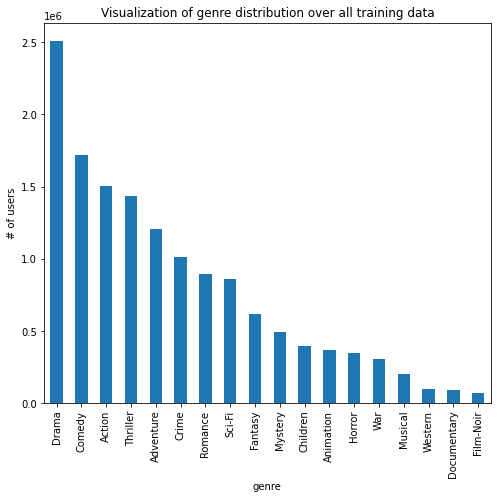

In [52]:
genre_top['genre'].value_counts().plot(kind = 'bar', figsize = (8,7))
plt.xlabel('genre')
plt.ylabel('# of users')
plt.title('Visualization of genre distribution over all training data')
plt.show

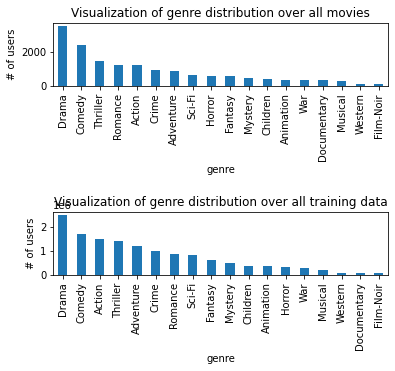

In [54]:
plt.subplot(2,1,1)
data_genres['genre'].value_counts().plot(kind = 'bar')
plt.xlabel('genre')
plt.ylabel('# of users')
plt.title('Visualization of genre distribution over all movies')

plt.subplot(2,1,2)
genre_top['genre'].value_counts().plot(kind = 'bar')
plt.xlabel('genre')
plt.ylabel('# of users')
plt.title('Visualization of genre distribution over all training data')

plt.subplots_adjust(hspace=2.0, top=1.0)

<AxesSubplot:>

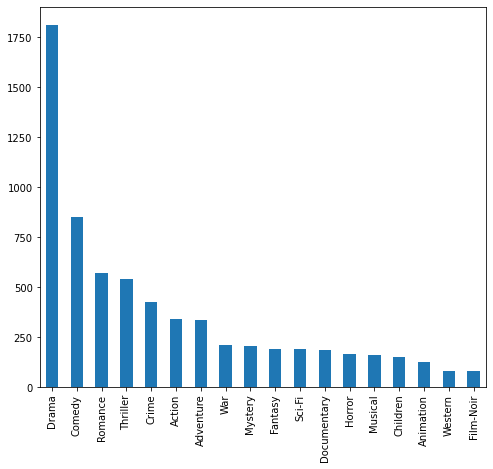

In [55]:
user_id = active_user_ids[0] # specific user id
genre_user = genre_top[genre_top['user'] == user_id]

genre_user['genre'].value_counts().plot(kind = 'bar', figsize = (8,7))

In [56]:
import time
unix_time = 1230782529 # some random timestamp from dataset
converted_time = time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(unix_time))

print ("initial unix-based timestamp: %s\nconverted time: %s"%(unix_time, converted_time))

initial unix-based timestamp: 1230782529
converted time: 2009-01-01 04:02:09


/tmp/ipykernel_3312/3232115942.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  converted_df['time'] = old_df['time'].replace([old_time], new_time) # replace the time column


Text(0.5, 1.0, 'Statistics of user activity')

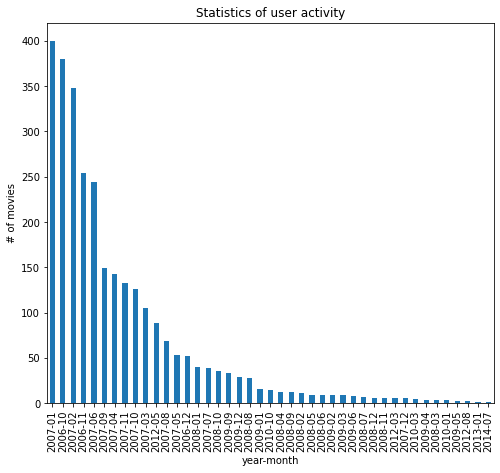

In [57]:
old_df = data_ratings[data_ratings['user'] == active_user_ids[0]] # Specific user id
converted_df = old_df

for old_time in old_df['time']:
    new_time = time.strftime('%Y-%m', time.localtime(old_time))
    converted_df['time'] = old_df['time'].replace([old_time], new_time) # replace the time column

converted_df['time'].value_counts().plot(kind = 'bar', figsize = (8,7))
plt.xlabel('year-month')
plt.ylabel('# of movies')
plt.title('Statistics of user activity')

In [58]:
eval_data = pd.read_csv("/opt/ml/input/data/eval/sample_submission.csv")

In [60]:
eval_data

,user,item
0,11,2571
1,11,2959
2,11,296
3,11,318
4,11,356
...,...,...
313595,138493,4993
313596,138493,7153
313597,138493,5952
313598,138493,593


In [63]:
year_df["year"].isnull()

0          False
1          False
2          False
3          False
4          False
           ...  
5152634    False
5152635    False
5152636    False
5152637    False
5152638    False
Name: year, Length: 5152639, dtype: bool

In [69]:
total_data = pd.merge(data_ratings, data_directors, how="left", on='item')
total_data = pd.merge(total_data, data_years, how="left", on='item')
total_data = pd.merge(total_data, data_genres, how="left", on=['item'])
total_data = pd.merge(total_data, data_writers, how="left", on=['item'])
total_data = pd.merge(total_data, data_titles, how="left", on=['item'])

In [70]:
total_data.sample(10)

,user,item,time,director,year,genre,writer,title
40409866,115268,3481,1252182990,nm0001241,2000.0,Romance,nm0222584,High Fidelity (2000)
19224776,54455,1282,1146361497,nm0789313,1940.0,Fantasy,nm0257481,Fantasia (1940)
43607263,124748,73344,1324600086,nm0002191,2009.0,Drama,nm2022382,"Prophet, A (Un Prophète) (2009)"
33960272,96784,5952,1287898983,nm0001392,2002.0,Adventure,nm0101991,"Lord of the Rings: The Two Towers, The (2002)"
12184136,34453,610,1294906417,nm0613471,1981.0,Action,nm0089676,Heavy Metal (1981)
8146580,23039,595,1422401226,nm0936374,1991.0,Children,nm0710020,Beauty and the Beast (1991)
13091592,36833,2959,1391304718,nm0000399,1999.0,Thriller,nm0657333,Fight Club (1999)
13247940,37282,4886,1119406128,nm0230032,2001.0,Fantasy,nm0682066,"Monsters, Inc. (2001)"
45762398,131036,588,1182988298,nm0166256,1992.0,Comedy,nm0560329,Aladdin (1992)
1788800,4786,4963,1159190468,nm0001752,2001.0,Thriller,nm0751207,Ocean's Eleven (2001)


In [74]:
# 총 item 개수 확인
num_item_ratings = set(data_ratings['item'].to_list())
num_item_directors = set(data_directors['item'])
num_item_years = set(data_years['item'])
num_item_genres = set(data_genres['item'])
num_item_writers = set(data_writers['item'])
num_item_titles = set(data_titles['item'])

In [75]:
print(len(num_item_ratings), len(num_item_directors), len(num_item_years), len(num_item_genres), len(num_item_writers), len(num_item_titles))

6807 5503 6799 6807 5648 6807


In [78]:
total_item = list(num_item_ratings) + list(num_item_directors) + list(num_item_years) + list(num_item_genres) + list(num_item_writers) + list(num_item_titles)
total_item = set(total_item)
len(total_item)

6807

In [80]:
num_item_ratings == total_item

True

In [82]:
# 각 데이터 중복 확인
data_genres[data_genres['item'].duplicated()]

,item,genre
1,318,Drama
3,2571,Sci-Fi
4,2571,Thriller
6,2959,Crime
7,2959,Drama
...,...,...
15921,62718,Romance
15923,65193,Romance
15927,109850,Crime
15928,109850,Drama


In [83]:
data_directors[data_directors['item'].duplicated()]

,item,director
369,4628,nm0000217
550,4628,nm0000338
723,26492,nm0000484
1074,50912,nm0000801
1281,50912,nm0001053
...,...,...
5865,6283,nm1988172
5867,108979,nm1988172
5887,115617,nm2320658
5888,88267,nm2320658


In [84]:
data_years[data_years['item'].duplicated()]

,item,year


In [85]:
data_writers[data_writers['item'].duplicated()]

,item,writer
223,93563,nm0000118
231,3632,nm0000122
271,1258,nm0000175
370,2402,nm0000230
401,288,nm0000233
...,...,...
11301,27397,nm5371819
11302,2987,nm5927607
11303,33463,nm5927607
11304,2987,nm5927608


In [86]:
data_titles[data_titles['item'].duplicated()]

,item,title


In [90]:
total_data[total_data['year'].isnull()]

,user,item,time,director,year,genre,writer,title
36020,132,6987,1114010962,NaN,NaN,Crime,nm0562346,"Cabinet of Dr. Caligari, The (Cabinet des Dr. ..."
36021,132,6987,1114010962,NaN,NaN,Fantasy,nm0562346,"Cabinet of Dr. Caligari, The (Cabinet des Dr. ..."
36022,132,6987,1114010962,NaN,NaN,Horror,nm0562346,"Cabinet of Dr. Caligari, The (Cabinet des Dr. ..."
138081,413,6987,1128709337,NaN,NaN,Crime,nm0562346,"Cabinet of Dr. Caligari, The (Cabinet des Dr. ..."
138082,413,6987,1128709337,NaN,NaN,Fantasy,nm0562346,"Cabinet of Dr. Caligari, The (Cabinet des Dr. ..."
...,...,...,...,...,...,...,...,...
48228665,138406,32898,1372717892,NaN,NaN,Sci-Fi,nm0894523,"Trip to the Moon, A (Voyage dans la lune, Le) ..."
48228666,138406,32898,1372717892,NaN,NaN,Sci-Fi,nm0920229,"Trip to the Moon, A (Voyage dans la lune, Le) ..."
48256586,138475,6987,1126812019,NaN,NaN,Crime,nm0562346,"Cabinet of Dr. Caligari, The (Cabinet des Dr. ..."
48256587,138475,6987,1126812019,NaN,NaN,Fantasy,nm0562346,"Cabinet of Dr. Caligari, The (Cabinet des Dr. ..."


In [91]:
import json

In [ ]:
json.read